In [34]:
import pandas as pd

In [35]:
attendance = pd.read_csv("attendance.csv")

In [36]:
attendance.head()

,year,league_id,team_id,park_id,span_first,span_last,games,openings,attendance
0,1871,NaN,BS1,BOS01,1871-05-16,1871-10-07,16,16,32600
1,1871,NaN,BS1,NYC01,1871-05-27,1871-05-27,1,1,3000
2,1871,NaN,CH1,CHI01,1871-05-08,1871-09-29,16,15,85500
3,1871,NaN,CH1,NYC01,1871-10-30,1871-10-30,1,1,600
4,1871,NaN,CL1,CIN01,1871-05-13,1871-07-22,2,2,2200


In [37]:
# Take away unneccesary columns

attendance_columns_of_interest = ['year', 'games', 'attendance']
attendance = attendance[attendance_columns_of_interest]

In [38]:
attendance.head()

,year,games,attendance
0,1871,16,32600
1,1871,1,3000
2,1871,16,85500
3,1871,1,600
4,1871,2,2200


In [39]:
attendance.describe()

,year,games,attendance
count,2944.000000,2944.000000,2.944000e+03
mean,1952.110054,70.804008,1.077794e+06
std,42.433247,19.765014,1.032963e+06
min,1871.000000,1.000000,0.000000e+00
25%,1915.000000,74.000000,4.836600e+04
50%,1959.000000,78.000000,8.747525e+05
75%,1990.000000,81.000000,1.805209e+06
max,2014.000000,89.000000,4.483203e+06


In [40]:
# Create new column with average attendance per game
# Copying the dataframe, not directly editing

new_attendance = attendance.copy()
new_attendance['average per game'] = attendance['attendance'] / attendance['games']

In [41]:
new_attendance.head()

,year,games,attendance,average per game
0,1871,16,32600,2037.50
1,1871,1,3000,3000.00
2,1871,16,85500,5343.75
3,1871,1,600,600.00
4,1871,2,2200,1100.00


In [42]:
# Accumulate the average per game for every year
# (there are multiple rows for each year currently)

new_attendance = new_attendance.groupby('year', as_index=False).sum()

new_attendance.columns = ['year', 'games', 'total_attendance', 'average per game per year']

new_attendance.head()

,year,games,total_attendance,average per game per year
0,1871,127,274000,31276.578339
1,1872,183,219050,16217.152436
2,1873,199,0,0.000000
3,1874,232,272497,10275.539312
4,1875,345,398576,20901.508019


In [43]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

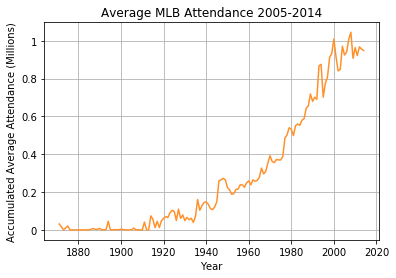

In [44]:
# Make a line graph of all every year

fig, ax = plt.subplots()

x = new_attendance['year']
y = new_attendance['average per game per year']

plt.grid(True)
plt.title("Average MLB Attendance 2005-2014")
plt.xlabel("Year")
plt.ylabel("Accumulated Average Attendance (Millions)")

scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

plt.plot(x, y, '#ff912b')

plt.show()

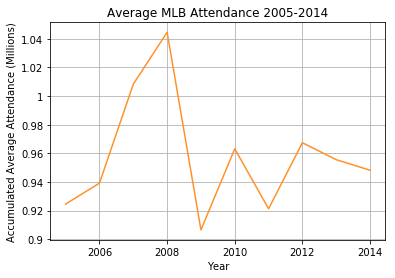

In [45]:
# Same as above, but only the past ten years (to show the levelling-out)

last_ten_years = new_attendance.tail(10)

fig, ax = plt.subplots()

x = last_ten_years['year']
y = last_ten_years['average per game per year']

plt.grid(True)
plt.title("Average MLB Attendance 2005-2014")
plt.xlabel("Year")
plt.ylabel("Accumulated Average Attendance (Millions)")

scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

plt.plot(x, y, '#ff912b')

plt.show()